# Inductively Shunted Superconducting Circuits

In this notebook, we try to reproduce the result of the ["Quantization of inductively shunted superconducting circuits"](https://journals-aps-org.stanford.idm.oclc.org/prb/abstract/10.1103/PhysRevB.94.144507) paper.

## Introduction

[Smith2016](https://journals-aps-org.stanford.idm.oclc.org/prb/abstract/10.1103/PhysRevB.94.144507) explained how the conventional method or perturbation theory does not correctly diagonalize their highly anharmonic inductively-shunted qubits. However, by using SQcircuit, we simply reproduced the energy spectrum. The diagram of the circuit is

<img src="pics/inductivelyShunted_pic1.png" width="300" align = "left"/>

We choose the device A circuit parameters from the following table of the paper:

<img src="pics/inductivelyShunted_pic2.png" width="360" align = "left"/>

## Circuit description

Firstly, we import the SQcircuit and the relavant libraries

In [1]:
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np

We define the single inductive loop of the circuit via `Loop` class

In [2]:
loop1 = sq.Loop()

The elements of the circuit can be defined via `Capacitor`, `Inductor`, and `Junction` classes in SQcircuit, and to define the circuit, we use the `Circuit` class. 

In [3]:
# define the circuit ’s elements
C_r = sq.Capacitor(20.3, "fF")
C_q =  sq.Capacitor(5.3, "fF")
L_r = sq.Inductor (15.6, "nH")
L_q = sq.Inductor(386, "nH", loops=[loop1])
L_s =  sq.Inductor(4.5, "nH", loops=[loop1])
JJ = sq.Junction(6.2, "GHz", loops=[loop1])

# define the circuit
elemetns = {(0, 1): [C_r],
            (1, 2): [L_r],
            (0, 2): [L_s],
            (2, 3): [L_q],
            (0, 3): [JJ,C_q]}
cr = sq.Circuit(elemetns)

By creating an object of `Circuit` class, SQcircuit systematically finds the correct set of transformations and basis to make the circuit ready to be diagonalized. However, before setting the truncation numbers for each mode and diagonalizing the Hamiltonian, we can gain more insight into our circuit by calling the `description()` method. This prints out which mode in SQcircuit is the charge mode or the harmonic mode with its natural frequency in GHz( the default unit). Moreover, it shows the prefactors in the Josephson junction part of the Hamiltonian $\tilde{\textbf{w}}_k$, which helps find the modes decoupled from the nonlinearity of the circuit.

In [4]:
cr.description()

mode_1: 	harmonic	freq=15618.705222871084
mode_2: 	harmonic	freq=7.891732789921152
mode_3: 	harmonic	freq=3.4973045347229648
w1: 	[1. 1. 1.]


The output of `description()` method specifies that our circuit is consist of three harmonic modes. However, the frequency of the first mode is about 16 THz which is extermly high. Since it is a fast-rotating mode and does not have impact on the dynamics of the lower eigenvalues of the circuit, we can remove it by setting its truncation number to one.

To determine the size of the Hilbert space, we specify the truncation number for each circuit mode via `truncationNumbers()` method. Note that this is a necessary step before diagonalizing the circuit.

In [5]:
cr.truncationNumbers([1,9,23])

## Circuit spectrum

To generate the spectrum of the circuit, firstly, we need to change and sweep the external flux of `loop1` by the `setFlux()` method. Then, we need to find the eigenfrequencies of the circuit that correspond to that external flux via `diag()` method. The following lines of code find the `spec` a 2D NumPy array so that each column of it contains the eigenfrequencies with respect to its external flux. 

In [6]:
# number of eigenvalues we aim for
numEig=10

# array that contains the spectrum
phi = np.linspace(-0.1,0.6,100)

# array that contains the spectrum
spec = np.zeros((numEig, len(phi)))

for i in range(len(phi)):
    # set the value of the flux external flux
    loop1.setFlux(phi[i])
    
    # diagonlize the circuit
    spec[:, i], _ = cr.diag(numEig)

Here we plot the spectrum as a function of external fluxes

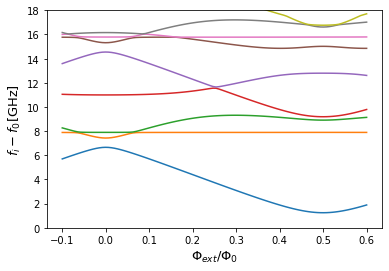

In [7]:
for i in range(1,numEig):
    plt.plot(phi, spec[i,:]- spec[0,:])
    
plt.xlabel("$\Phi_{ext}/\Phi_0$", fontsize=13)
plt.ylabel(r"$f_i-f_0$[GHz]", fontsize=13)
plt.ylim([0,18])
plt.show()

The next cell shows the spectrum from the figure 2 of the paper, which is the same spectrum that SQcircuit calculated.

<img src="pics/inductivelyShunted_pic3.png" width="380" align = "left" />